In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
df = pd.read_csv("asd_all_ML.csv").drop("Unnamed: 0", axis=1)
df.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age',
       'Sex', 'Jaundice', 'Family_ASD', 'Class', 'asian', 'black', 'hispanic',
       'latino', 'middle eastern', 'others', 'south asians', 'white'],
      dtype='object')

In [5]:
cleanup = {"Class": {0: "No", 1: "Yes"}}
df.replace(cleanup, inplace=True)
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,Family_ASD,Class,asian,black,hispanic,latino,middle eastern,others,south asians,white
0,0,1,1,0,0,1,1,0,0,1,...,0,No,0,0,0,0,1,0,0,0
1,0,1,1,1,1,1,1,0,0,1,...,0,Yes,0,0,0,0,1,0,0,0
2,0,1,1,1,1,1,0,1,1,1,...,0,Yes,0,0,0,0,0,0,0,1
3,0,1,1,0,1,1,1,0,0,0,...,0,No,0,0,0,0,1,0,0,0
4,0,0,1,1,1,1,0,1,0,1,...,0,No,0,0,0,0,0,0,0,1


# ML with just Jaundice as predictor of Class

In [6]:
X = pd.DataFrame(df['Jaundice'])
Y = df['Class']
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(
    X, Y, test_size=validation_size, random_state=seed)

In [7]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [8]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

results = []
names = []

# evaluate each model in turn
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(
        model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarn

LR: 0.600443 (0.040571)
LDA: 0.595074 (0.034905)
KNN: 0.508407 (0.101850)
CART: 0.600443 (0.040571)


/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/m

RF: 0.599110 (0.040344)
NB: 0.595074 (0.038072)


/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/markzepeda/opt/anacon

SVM: 0.600443 (0.040571)


/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Logistic Regression was had a sqaured value of .6

# ML with all predictors 

In [9]:
X = df.drop("Class", axis=1)
Y = df['Class']
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(
    X, Y, test_size=validation_size, random_state=seed)

In [10]:
seed = 7
scoring = 'accuracy'

results = []
names = []

# evaluate each model in turn
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(
        model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarn

LR: 0.990662 (0.006797)
LDA: 0.965320 (0.013906)
KNN: 0.893919 (0.013568)
CART: 0.925942 (0.026935)
RF: 0.946617 (0.015556)


/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/m

NB: 0.918609 (0.027628)


/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/markzepeda/opt/anacon

SVM: 0.951978 (0.014523)


/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/markzepeda/opt/anacon

Logistic Regression had r-squared value of .99

RF had rsquared of .95

### Random Forest with hyperparameter tuning 

In [11]:
n_estimators_array = [1, 4, 5, 8, 10, 20, 50, 75, 100, 250, 500]
results = []
for n in n_estimators_array:
    forest = RandomForestClassifier(n_estimators=n, random_state=76)
    forest.fit(X_train, Y_train)
    result = accuracy_score(Y_validation, forest.predict(X_validation))
    results.append(result) 
    print(n, ':', result)

1 : 0.8933333333333333
4 : 0.9093333333333333
5 : 0.904
8 : 0.9146666666666666
10 : 0.92
20 : 0.936
50 : 0.952
75 : 0.9546666666666667
100 : 0.9546666666666667
250 : 0.96
500 : 0.9626666666666667


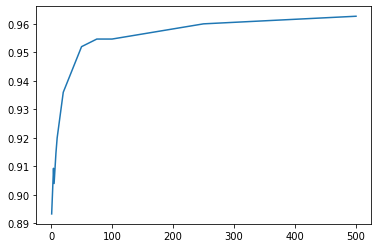

In [12]:
plt.plot(n_estimators_array, results)

In [13]:
from sklearn.model_selection import RandomizedSearchCV
# Number of features to consider at every split
max_features = ['auto', None, 'log2']
# Maximum number of levels in tree
max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, None]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'max_features': ['auto', None, 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, None], 'min_samples_leaf': [1, 2, 4]}


In [14]:
rf = RandomForestClassifier(n_estimators=500)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42)
# Fit the random search model
rf_random.fit(X_train, Y_train)

/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:266: UserWarning: The total space of parameters 90 is smaller than n_iter=100. Running 90 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 90 candidates, totalling 270 fits
[CV] min_samples_leaf=1, max_features=auto, max_depth=10 .............
[CV]  min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.7s
[CV] min_samples_leaf=1, max_features=auto, max_depth=10 .............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV]  min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.6s
[CV] min_samples_leaf=1, max_features=auto, max_depth=10 .............
[CV]  min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.6s
[CV] min_samples_leaf=2, max_features=auto, max_depth=10 .............
[CV]  min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.6s
[CV] min_samples_leaf=2, max_features=auto, max_depth=10 .............
[CV]  min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.6s
[CV] min_samples_leaf=2, max_features=auto, max_depth=10 .............
[CV]  min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.6s
[CV] min_samples_leaf=4, max_features=auto, max_depth=10 .............
[CV]  min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.6s
[CV] min_samples_leaf=4, max_features=auto, max_depth=10 .............
[CV]  min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.6s
[CV] min_samples_leaf=4, max_features=auto, max_depth=10 ......

[CV]  min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.6s
[CV] min_samples_leaf=2, max_features=auto, max_depth=30 .............
[CV]  min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.6s
[CV] min_samples_leaf=4, max_features=auto, max_depth=30 .............
[CV]  min_samples_leaf=4, max_features=auto, max_depth=30, total=   0.6s
[CV] min_samples_leaf=4, max_features=auto, max_depth=30 .............
[CV]  min_samples_leaf=4, max_features=auto, max_depth=30, total=   0.6s
[CV] min_samples_leaf=4, max_features=auto, max_depth=30 .............
[CV]  min_samples_leaf=4, max_features=auto, max_depth=30, total=   0.6s
[CV] min_samples_leaf=1, max_features=None, max_depth=30 .............
[CV]  min_samples_leaf=1, max_features=None, max_depth=30, total=   0.9s
[CV] min_samples_leaf=1, max_features=None, max_depth=30 .............
[CV]  min_samples_leaf=1, max_features=None, max_depth=30, total=   0.9s
[CV] min_samples_leaf=1, max_features=None, max_depth=30 ......

[CV]  min_samples_leaf=4, max_features=auto, max_depth=50, total=   0.6s
[CV] min_samples_leaf=4, max_features=auto, max_depth=50 .............
[CV]  min_samples_leaf=4, max_features=auto, max_depth=50, total=   0.6s
[CV] min_samples_leaf=1, max_features=None, max_depth=50 .............
[CV]  min_samples_leaf=1, max_features=None, max_depth=50, total=   0.8s
[CV] min_samples_leaf=1, max_features=None, max_depth=50 .............
[CV]  min_samples_leaf=1, max_features=None, max_depth=50, total=   0.9s
[CV] min_samples_leaf=1, max_features=None, max_depth=50 .............
[CV]  min_samples_leaf=1, max_features=None, max_depth=50, total=   0.8s
[CV] min_samples_leaf=2, max_features=None, max_depth=50 .............
[CV]  min_samples_leaf=2, max_features=None, max_depth=50, total=   0.8s
[CV] min_samples_leaf=2, max_features=None, max_depth=50 .............
[CV]  min_samples_leaf=2, max_features=None, max_depth=50, total=   0.8s
[CV] min_samples_leaf=2, max_features=None, max_depth=50 ......

[CV]  min_samples_leaf=1, max_features=None, max_depth=70, total=   0.8s
[CV] min_samples_leaf=1, max_features=None, max_depth=70 .............
[CV]  min_samples_leaf=1, max_features=None, max_depth=70, total=   0.8s
[CV] min_samples_leaf=2, max_features=None, max_depth=70 .............
[CV]  min_samples_leaf=2, max_features=None, max_depth=70, total=   0.8s
[CV] min_samples_leaf=2, max_features=None, max_depth=70 .............
[CV]  min_samples_leaf=2, max_features=None, max_depth=70, total=   0.8s
[CV] min_samples_leaf=2, max_features=None, max_depth=70 .............
[CV]  min_samples_leaf=2, max_features=None, max_depth=70, total=   0.8s
[CV] min_samples_leaf=4, max_features=None, max_depth=70 .............
[CV]  min_samples_leaf=4, max_features=None, max_depth=70, total=   0.7s
[CV] min_samples_leaf=4, max_features=None, max_depth=70 .............
[CV]  min_samples_leaf=4, max_features=None, max_depth=70, total=   0.8s
[CV] min_samples_leaf=4, max_features=None, max_depth=70 ......

[CV]  min_samples_leaf=2, max_features=None, max_depth=90, total=   0.8s
[CV] min_samples_leaf=2, max_features=None, max_depth=90 .............
[CV]  min_samples_leaf=2, max_features=None, max_depth=90, total=   0.9s
[CV] min_samples_leaf=4, max_features=None, max_depth=90 .............
[CV]  min_samples_leaf=4, max_features=None, max_depth=90, total=   0.8s
[CV] min_samples_leaf=4, max_features=None, max_depth=90 .............
[CV]  min_samples_leaf=4, max_features=None, max_depth=90, total=   0.8s
[CV] min_samples_leaf=4, max_features=None, max_depth=90 .............
[CV]  min_samples_leaf=4, max_features=None, max_depth=90, total=   0.8s
[CV] min_samples_leaf=1, max_features=log2, max_depth=90 .............
[CV]  min_samples_leaf=1, max_features=log2, max_depth=90, total=   0.6s
[CV] min_samples_leaf=1, max_features=log2, max_depth=90 .............
[CV]  min_samples_leaf=1, max_features=log2, max_depth=90, total=   0.6s
[CV] min_samples_leaf=1, max_features=log2, max_depth=90 ......

[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:  3.1min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators=500,
                                                    n_jobs=None,
 

In [15]:
rf_random.best_params_

{'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 30}

In [16]:
forest = RandomForestClassifier(n_estimators=20, min_samples_leaf=2, max_features='auto', max_depth=50)
forest.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=50, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [17]:
forestPredictions = forest.predict(X_validation)
print(confusion_matrix(Y_validation, forestPredictions))
print(classification_report(Y_validation, forestPredictions))

[[217  15]
 [  8 135]]
              precision    recall  f1-score   support

          No       0.96      0.94      0.95       232
         Yes       0.90      0.94      0.92       143

    accuracy                           0.94       375
   macro avg       0.93      0.94      0.94       375
weighted avg       0.94      0.94      0.94       375



A6                0.182977
A9                0.152462
A4                0.145508
A5                0.107556
A3                0.074673
A10               0.058382
A7                0.056884
A1                0.053363
Age               0.044543
A8                0.043345
A2                0.028660
Sex               0.009702
white             0.009151
asian             0.008202
middle eastern    0.007717
Family_ASD        0.004791
Jaundice          0.003560
latino            0.002979
south asians      0.002334
hispanic          0.001261
others            0.001132
black             0.000814
dtype: float64


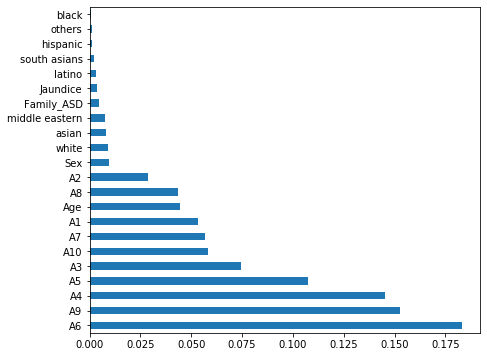

In [18]:
feature_importances = pd.Series(forest.feature_importances_, index=X.columns)
feature_importances.sort_values(inplace=True, ascending=False)
print(feature_importances)
feature_importances.plot(kind='barh', figsize=(7,6))

# Machine Learning with best fit model predictors taken from stepwise regregression

In [19]:
X = df.drop(['Family_ASD', 'Class', 'black', 'hispanic',
       'latino', 'middle eastern', 'others', 'white', 'Age', 'Jaundice'], axis=1)
Y = df['Class']
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(
    X, Y, test_size=validation_size, random_state=seed)

In [20]:
seed = 7
scoring = 'accuracy'

results = []
names = []

# evaluate each model in turn
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(
        model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarn

LR: 0.999333 (0.002000)
LDA: 0.971320 (0.014306)
KNN: 0.937964 (0.013327)
CART: 0.952631 (0.014453)


/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/m

RF: 0.961293 (0.017126)
NB: 0.947960 (0.022286)
SVM: 1.000000 (0.000000)


/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/markzepeda/opt/anacon

### Random Forest with hyperparameter tuning 

In [21]:
n_estimators_array = [1, 4, 5, 8, 10, 20, 50, 75, 100, 250, 500]
results = []
for n in n_estimators_array:
    forest = RandomForestClassifier(n_estimators=n, random_state=76)
    forest.fit(X_train, Y_train)
    result = accuracy_score(Y_validation, forest.predict(X_validation))
    results.append(result) 
    print(n, ':', result)

1 : 0.9173333333333333
4 : 0.936
5 : 0.936
8 : 0.936
10 : 0.9493333333333334
20 : 0.9546666666666667
50 : 0.9546666666666667
75 : 0.952
100 : 0.9466666666666667
250 : 0.9493333333333334
500 : 0.944


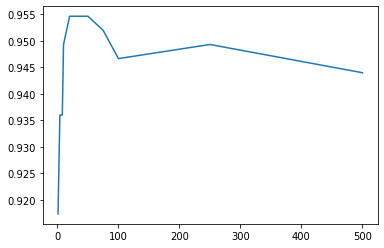

In [22]:
plt.plot(n_estimators_array, results)

In [23]:
from sklearn.model_selection import RandomizedSearchCV
# Number of features to consider at every split
max_features = ['auto', None, 'log2']
# Maximum number of levels in tree
max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, None]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'max_features': ['auto', None, 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, None], 'min_samples_leaf': [1, 2, 4]}


In [24]:
rf = RandomForestClassifier(n_estimators=500)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42)
# Fit the random search model
rf_random.fit(X_train, Y_train)

/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:266: UserWarning: The total space of parameters 90 is smaller than n_iter=100. Running 90 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 90 candidates, totalling 270 fits
[CV] min_samples_leaf=1, max_features=auto, max_depth=10 .............
[CV]  min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.6s
[CV] min_samples_leaf=1, max_features=auto, max_depth=10 .............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.6s
[CV] min_samples_leaf=1, max_features=auto, max_depth=10 .............
[CV]  min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.6s
[CV] min_samples_leaf=2, max_features=auto, max_depth=10 .............
[CV]  min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.6s
[CV] min_samples_leaf=2, max_features=auto, max_depth=10 .............
[CV]  min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.5s
[CV] min_samples_leaf=2, max_features=auto, max_depth=10 .............
[CV]  min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.6s
[CV] min_samples_leaf=4, max_features=auto, max_depth=10 .............
[CV]  min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.6s
[CV] min_samples_leaf=4, max_features=auto, max_depth=10 .............
[CV]  min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.5s
[CV] min_samples_leaf=4, max_features=auto, max_depth=10 ......

[CV]  min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.5s
[CV] min_samples_leaf=2, max_features=auto, max_depth=30 .............
[CV]  min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.5s
[CV] min_samples_leaf=4, max_features=auto, max_depth=30 .............
[CV]  min_samples_leaf=4, max_features=auto, max_depth=30, total=   0.5s
[CV] min_samples_leaf=4, max_features=auto, max_depth=30 .............
[CV]  min_samples_leaf=4, max_features=auto, max_depth=30, total=   0.5s
[CV] min_samples_leaf=4, max_features=auto, max_depth=30 .............
[CV]  min_samples_leaf=4, max_features=auto, max_depth=30, total=   0.5s
[CV] min_samples_leaf=1, max_features=None, max_depth=30 .............
[CV]  min_samples_leaf=1, max_features=None, max_depth=30, total=   0.7s
[CV] min_samples_leaf=1, max_features=None, max_depth=30 .............
[CV]  min_samples_leaf=1, max_features=None, max_depth=30, total=   0.6s
[CV] min_samples_leaf=1, max_features=None, max_depth=30 ......

[CV]  min_samples_leaf=4, max_features=auto, max_depth=50, total=   0.6s
[CV] min_samples_leaf=4, max_features=auto, max_depth=50 .............
[CV]  min_samples_leaf=4, max_features=auto, max_depth=50, total=   0.6s
[CV] min_samples_leaf=1, max_features=None, max_depth=50 .............
[CV]  min_samples_leaf=1, max_features=None, max_depth=50, total=   0.7s
[CV] min_samples_leaf=1, max_features=None, max_depth=50 .............
[CV]  min_samples_leaf=1, max_features=None, max_depth=50, total=   0.7s
[CV] min_samples_leaf=1, max_features=None, max_depth=50 .............
[CV]  min_samples_leaf=1, max_features=None, max_depth=50, total=   0.7s
[CV] min_samples_leaf=2, max_features=None, max_depth=50 .............
[CV]  min_samples_leaf=2, max_features=None, max_depth=50, total=   0.7s
[CV] min_samples_leaf=2, max_features=None, max_depth=50 .............
[CV]  min_samples_leaf=2, max_features=None, max_depth=50, total=   0.7s
[CV] min_samples_leaf=2, max_features=None, max_depth=50 ......

[CV]  min_samples_leaf=1, max_features=None, max_depth=70, total=   0.6s
[CV] min_samples_leaf=1, max_features=None, max_depth=70 .............
[CV]  min_samples_leaf=1, max_features=None, max_depth=70, total=   0.6s
[CV] min_samples_leaf=2, max_features=None, max_depth=70 .............
[CV]  min_samples_leaf=2, max_features=None, max_depth=70, total=   0.6s
[CV] min_samples_leaf=2, max_features=None, max_depth=70 .............
[CV]  min_samples_leaf=2, max_features=None, max_depth=70, total=   0.6s
[CV] min_samples_leaf=2, max_features=None, max_depth=70 .............
[CV]  min_samples_leaf=2, max_features=None, max_depth=70, total=   0.6s
[CV] min_samples_leaf=4, max_features=None, max_depth=70 .............
[CV]  min_samples_leaf=4, max_features=None, max_depth=70, total=   0.6s
[CV] min_samples_leaf=4, max_features=None, max_depth=70 .............
[CV]  min_samples_leaf=4, max_features=None, max_depth=70, total=   0.6s
[CV] min_samples_leaf=4, max_features=None, max_depth=70 ......

[CV]  min_samples_leaf=2, max_features=None, max_depth=90, total=   0.7s
[CV] min_samples_leaf=2, max_features=None, max_depth=90 .............
[CV]  min_samples_leaf=2, max_features=None, max_depth=90, total=   0.7s
[CV] min_samples_leaf=4, max_features=None, max_depth=90 .............
[CV]  min_samples_leaf=4, max_features=None, max_depth=90, total=   0.7s
[CV] min_samples_leaf=4, max_features=None, max_depth=90 .............
[CV]  min_samples_leaf=4, max_features=None, max_depth=90, total=   0.7s
[CV] min_samples_leaf=4, max_features=None, max_depth=90 .............
[CV]  min_samples_leaf=4, max_features=None, max_depth=90, total=   0.7s
[CV] min_samples_leaf=1, max_features=log2, max_depth=90 .............
[CV]  min_samples_leaf=1, max_features=log2, max_depth=90, total=   0.6s
[CV] min_samples_leaf=1, max_features=log2, max_depth=90 .............
[CV]  min_samples_leaf=1, max_features=log2, max_depth=90, total=   0.7s
[CV] min_samples_leaf=1, max_features=log2, max_depth=90 ......

[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:  2.8min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators=500,
                                                    n_jobs=None,
 

In [25]:
rf_random.best_params_

{'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 60}

In [26]:
forest = RandomForestClassifier(n_estimators=20, min_samples_leaf=2, max_features='auto', max_depth=50)
forest.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=50, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [27]:
forestPredictions = forest.predict(X_validation)
print(confusion_matrix(Y_validation, forestPredictions))
print(classification_report(Y_validation, forestPredictions))

[[223   9]
 [  9 134]]
              precision    recall  f1-score   support

          No       0.96      0.96      0.96       232
         Yes       0.94      0.94      0.94       143

    accuracy                           0.95       375
   macro avg       0.95      0.95      0.95       375
weighted avg       0.95      0.95      0.95       375



A6              0.179038
A4              0.164927
A9              0.142593
A5              0.129355
A3              0.097161
A7              0.065479
A1              0.063414
A10             0.055642
A8              0.045647
A2              0.034585
Sex             0.012128
asian           0.007720
south asians    0.002312
dtype: float64


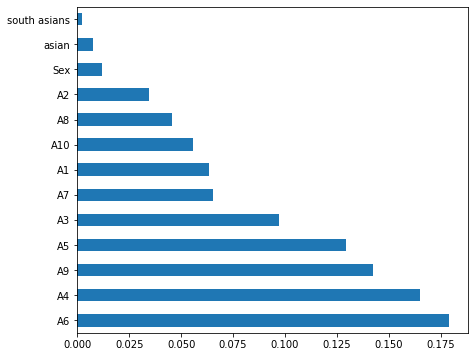

In [28]:
feature_importances = pd.Series(forest.feature_importances_, index=X.columns)
feature_importances.sort_values(inplace=True, ascending=False)
print(feature_importances)
feature_importances.plot(kind='barh', figsize=(7,6))